In [6]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
#define the directory
os.chdir('C:/Users/sameer/downloads/Dataset')

In [55]:
#import the training data =set
train = pd.read_csv('train.csv')

In [56]:
#import the test set
X_test =pd.read_csv('test.csv')

In [10]:
#first five elements
train.head()


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [11]:
#training data inforamtion
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
ID                         88858 non-null object
Estimated_Insects_Count    88858 non-null int64
Crop_Type                  88858 non-null int64
Soil_Type                  88858 non-null int64
Pesticide_Use_Category     88858 non-null int64
Number_Doses_Week          88858 non-null int64
Number_Weeks_Used          79858 non-null float64
Number_Weeks_Quit          88858 non-null int64
Season                     88858 non-null int64
Crop_Damage                88858 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [12]:
#matrix shape
train.shape

(88858, 10)

In [13]:
#statistical data
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


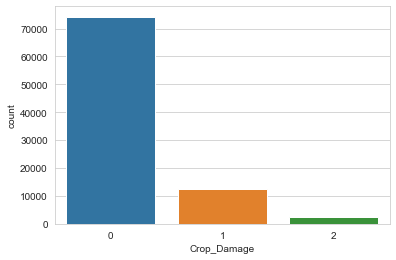

In [14]:
#visualisation of training results
sns.set_style('whitegrid')
sns.countplot(x='Crop_Damage',data =train)

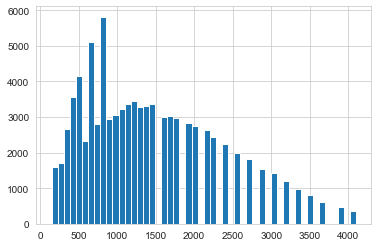

In [15]:
#histogram representation of insect count
train['Estimated_Insects_Count'].hist(bins =50)

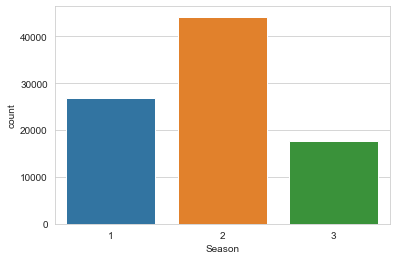

In [16]:
#count of seasons for a crop
sns.set_style('whitegrid')
sns.countplot(x ='Season',data =train)

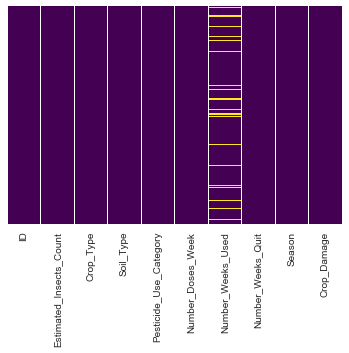

In [17]:
#heatmap to find the null values
sns.heatmap(train.isnull(),yticklabels= False,cbar =False,cmap ='viridis')

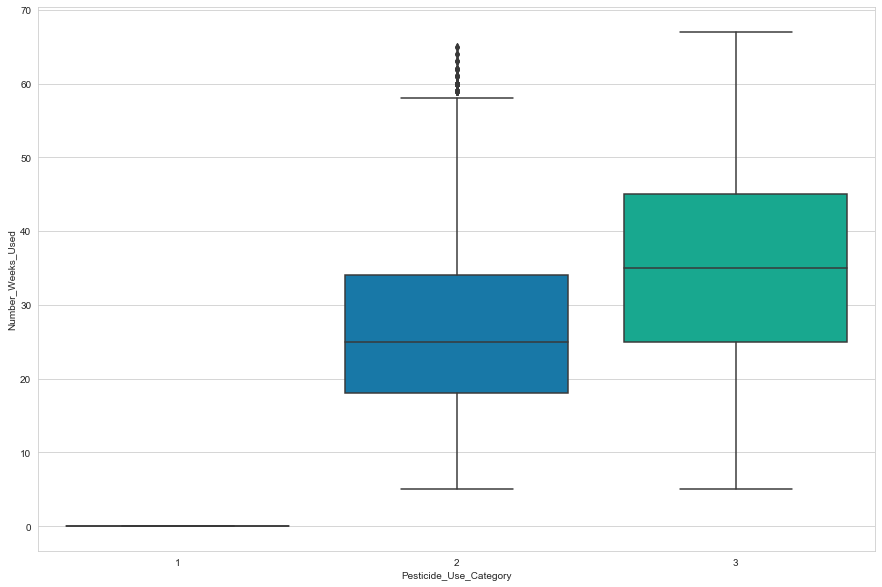

In [18]:
#box plot to find the avarage distrubution of category against number of weeks
plt.figure(figsize =(15,10))
sns.boxplot(x ='Pesticide_Use_Category',y='Number_Weeks_Used',data=train,palette ='winter')

In [19]:
#from the above avarage week count of category,
#finding the null week number values
def week_numbers(col):
    Number_Weeks_Used = col[0]
    Pesticide_Use_Category = col[1]
    
    if pd.isnull(Number_Weeks_Used):
        
        if Pesticide_Use_Category == 1:
            return 0
        
        elif Pesticide_Use_Category ==2:
            return 25
        
        else:
            return 35
    
    else:
        return Number_Weeks_Used
            

In [24]:
#filling of null week number values
train['Number_Weeks_Used'] = train[['Number_Weeks_Used','Pesticide_Use_Category']].apply(week_numbers,axis=1)
X_test['Number_Weeks_Used'] = X_test[['Number_Weeks_Used','Pesticide_Use_Category']].apply(week_numbers,axis=1)



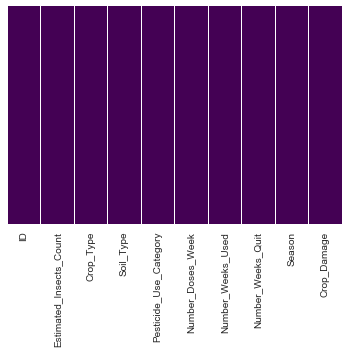

In [25]:
#rechecking if there is any null values
sns.heatmap(train.isnull(),yticklabels= False,cbar =False,cmap ='viridis')

In [33]:
#dropping the crop_damage from input training set
train.drop('Crop_Damage',axis =1).head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000001,188,1,0,1,0,0.0,0,1
1,F00000003,209,1,0,1,0,0.0,0,2
2,F00000004,257,1,0,1,0,0.0,0,2
3,F00000005,257,1,1,1,0,0.0,0,2
4,F00000006,342,1,0,1,0,0.0,0,2


In [30]:
#first five crop damage set
train['Crop_Damage'].head()

0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

In [36]:
#removing ID numbers from the test set
train.drop(['ID'],axis =1,inplace =True)
X_test.drop(['ID'],axis=1,inplace = True)

In [37]:
#importing from library
from sklearn.model_selection import train_test_split

In [38]:
#splitting the training and cross varification set
X_train,X_cv,y_train,y_cv = train_test_split(train.drop('Crop_Damage',axis =1),train['Crop_Damage'],test_size= 0.2,random_state =101)

In [39]:
#importing from llibrary
from sklearn.linear_model import LogisticRegression

In [40]:
#finding the logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
#predicting the result values
predictions = logmodel.predict(X_cv)

In [42]:
#importing from library
from sklearn.metrics import confusion_matrix

In [43]:
#finding the accuracy matrix
accuracy = confusion_matrix(y_cv,predictions)

In [44]:
accuracy

array([[14643,   158,     0],
       [ 2385,   137,     0],
       [  420,    29,     0]], dtype=int64)

In [45]:
#the prediction array
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
#importing from library
from sklearn.metrics import accuracy_score

In [47]:
#accuracy score of cross varification set
accuracy = accuracy_score(y_cv,predictions)

In [48]:
accuracy

0.8316452847175332

In [49]:
#predicting the outcomes of test set
test_predictions = logmodel.predict(X_test)

In [50]:
test_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
#exporting the outcome values
test_prediction = pd.DataFrame(test_predictions, columns=['predictions']).to_csv('test_pred.csv')